# Gravity forward modeling

Name: Holden Alpern

Date: 10/03/2024

### In this lab we will build our intuition about gravity modeling and start some gravity modeling for our ice shelves

All the tasks in this lab are:
* Make a figure of the magnitude of the gravity inside and outside of a uniform sphere-like Earth - 2 pts
* Make gravity profiles over an underground tunnel and plot them - 2 pts
* Calculate the gravitational effect of Mount Shasta's topography - 2 pts
* Forward calculate the gravity due to ice, water, and rock in your ice shelf domain - 4 pts

### Gravitational attraction of a uniform sphere

The gravitational attraction outside of a uniform sphere is:

$$ g(P) = -\gamma\frac{\frac{4}{3}\pi a^3 \rho}{r^2}\hat{r} $$

Where $\rho$ is the density of sphere, $a$ is the radius of the sphere, $\gamma$ is the gravitational constant, $\hat{r}$ is a unit vector directed from the sphere center $(x',y',z')$ to point $P(x,y,z)$ and $r$ is the magnitude the vector $\vec{r}$:

$$ \hat{r} = \frac{1}{r}\left[(x-x')\hat{\imath}+(y-y')\hat{\jmath}+(z-z')\hat{k}\right] $$

The gravitational attraction inside of a uniform sphere is:

$$ g(P) = -\frac{4}{3}\pi\gamma\rho r \hat{r} $$

Note that $r$ follows the distance equation:

$$ r = \sqrt{(x-x')^2+(y-y')^2+(z-z')^2} $$

## Make a figure of the magnitude of the gravity inside and outside of a uniform sphere-like Earth - 2 pts

* Use a radius of 6,378 km and a density of 5,514 $kg/m^3$
* The equation above shows an $r$ vector with 3 components, however we are making a 2-dimensional map so you only need 2 components
* Note we want a figure of the magnitude of the gravitational attraction: $|g| = \sqrt{g_x^2+g_y^2}$
* You may want to make a function that can compute the gravity components at a single point and then iterate over your grid, or you can try to vectorize the calculation over numpy arrays
* Note if you place the center of the sphere at the origin, i.e., (0,0) you can disregard the $x', y', z'$ and simplify the equations
* You should be able to see in your figure that the maximum is near the Earth's surface and is right around 9.81 $m/s^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import harmonica as hm
import verde as vd
from pathlib import Path
import xarray as xr
import pandas as pd

# Let's import the gravitational constant
from choclo.constants import GRAVITATIONAL_CONST
GRAVITATIONAL_CONST

6.6743e-11

### 1. Define variables for a, rho, and make coordinates

* convert the radius to meters
* use `np.arange` or `np.linspace` to make $x$ and $y$ arrays
* The $x$ and $y$ arrays should extend beyond the radius of the Earth (in meters) by a good margin
* Use `np.meshgrid` to turn the $x$ and $y$ into full coordinate arrays

In [2]:
################################
####### Your work here #########
a = 6378 * 1000
rho = 5514
G = GRAVITATIONAL_CONST

# Create x and y arrays going to ±7000 km (7000000 meters)
extent = 7000 * 1000  # 7000 km in meters
x = np.linspace(-extent, extent, 500)  # 500 points between -7000000 and 7000000 meters
y = np.linspace(-extent, extent, 500)

# Create full coordinate arrays using np.meshgrid
X, Y = np.meshgrid(x, y)

# Check output
X, Y



(array([[-7000000.        , -6971943.88777555, -6943887.7755511 , ...,
          6943887.7755511 ,  6971943.88777555,  7000000.        ],
        [-7000000.        , -6971943.88777555, -6943887.7755511 , ...,
          6943887.7755511 ,  6971943.88777555,  7000000.        ],
        [-7000000.        , -6971943.88777555, -6943887.7755511 , ...,
          6943887.7755511 ,  6971943.88777555,  7000000.        ],
        ...,
        [-7000000.        , -6971943.88777555, -6943887.7755511 , ...,
          6943887.7755511 ,  6971943.88777555,  7000000.        ],
        [-7000000.        , -6971943.88777555, -6943887.7755511 , ...,
          6943887.7755511 ,  6971943.88777555,  7000000.        ],
        [-7000000.        , -6971943.88777555, -6943887.7755511 , ...,
          6943887.7755511 ,  6971943.88777555,  7000000.        ]]),
 array([[-7000000.        , -7000000.        , -7000000.        , ...,
         -7000000.        , -7000000.        , -7000000.        ],
        [-6971943.8

### 2. Calculate the magnitude of the $\vec{r}$ for the whole grid using vectorization

Vectorization means calculating something across a whole array automatically

$ r = \sqrt{(x-x')^2+(y-y')^2} $

with the sphere at the origin:

$ r = \sqrt{x^2+y^2} $

In [3]:
################################
####### Your work here #########
r = np.sqrt(X**2 + Y**2)



### 3. Calculate $g_x$ and $g_y$ for outside and inside the sphere

In [4]:
################################
####### Your work here #########

# Creates a mask to distinguish inside and outside the sphere
inside = r <= a
outside = r > a

gnum = G * 4/3 * np.pi * rho

# Gravitational field inside the sphere
gx_inside = -(gnum * r[inside]) * (1 / r[inside]) * X[inside]
gy_inside = -(gnum * r[inside]) * (1 / r[inside]) * Y[inside]

# Gravitational field outside the sphere
gx_outside = -(gnum * a**3 / r[outside]**2) * (1 / r[outside]) * X[outside]
gy_outside = -(gnum * a**3 / r[outside]**2) * (1 / r[outside]) * Y[outside]

### 4. Calculate the magnitude of the gravitational field and filter it for inside/outside the sphere

In [5]:
################################
####### Your work here #########

# Combines the gravitational fields for gx and gy
gx = np.zeros_like(r)
gy = np.zeros_like(r)

gx[inside] = gx_inside
gy[inside] = gy_inside

gx[outside] = gx_outside
gy[outside] = gy_outside

# Magnitude of gravitational field
g_magnitude = np.sqrt(gx**2 + gy**2)

### 5. Make 2D figure of the magnitude of gravitational attraction in the x-y plane

* Use pcolormesh
* You can put a circle on your plot at the Earth's radius using a `Circle` patch followed by `ax.add_patch(circle)` assuming the patch is named circle
* print the `np.max` of the magnitude to see that it is near 9.81 $m/s^2$

Maximum value of gravitational magnitude: 9.83203768634212


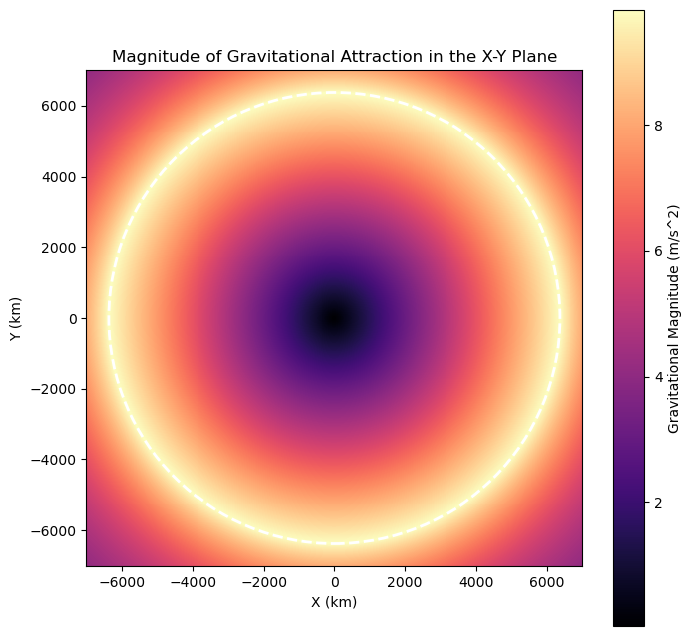

In [6]:
################################
####### Your work here #########

from matplotlib.patches import Circle

#Plot gravitational magnitude using pcolormesh
fig, ax = plt.subplots(figsize=(8, 8))
mesh = ax.pcolormesh(X / 1000, Y / 1000, g_magnitude, shading='auto', cmap='magma')

#Colorbar to show the magnitude of gravity
cbar = plt.colorbar(mesh, ax=ax)
cbar.set_label('Gravitational Magnitude (m/s^2)')

#Circle
circle = Circle((0, 0), a / 1000, color='white', fill=False, linewidth=2, linestyle='--')
ax.add_patch(circle)

#Axis labels and title
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_title('Magnitude of Gravitational Attraction in the X-Y Plane')

#Maximum value of the gravitational magnitude
print("Maximum value of gravitational magnitude:", np.max(g_magnitude))

#Scaling
ax.set_aspect('equal', 'box')

#Show plot
plt.show()

## Make gravity profiles over an underground tunnel and plot them - 2 pts

We will model the tunnel as a cylinder that is infinite in length. The gravitational attraction of an infinite cylinder is:

$$ g(p) = \frac{-2 \pi \gamma \rho a^2}{r}\hat{r} $$

Where $\rho$ is the density contrast of the tunnel, $a$ is the radius of the tunnel, $r$ is the magnitude of the poosition vector $\vec{r}$ and $\hat{r}$ is a unit vector in the direction of $r$

* Calculate profiles for 4 different tunnel depths for a water filled and an air filled tunnel
* Plot all of the air filled profiles on one subplot and the water filled ones on another

**Use your 4 depths to estimate at what point the tunnel becomes undetectable if our gravimeter has a noise level of 0.025 mGal**

Follow the steps below:

### 1. Define density contrast of air and water, and define radius, and coordinates

* The denisty contrast, $\rho$, of the air tunnel is the density of air minus average rock density, i.e., -2670 $kg/m^3$
* The density contrast of the water filled tunnel is the density of water minus average rock density, i.e., -1670 $kg/m^3$
* Use a tunnel radius of 1 m
* $x$ coordinates extend from -30 m to +30 m
* $z$ coordinates are all at the surface, i.e., 0 m
* Be sure the coordinates are dense enough to get a smooth profile
* Choose 4 tunnel depths between 2 and 20 m and puth them in a list or tuple

In [7]:
################################
####### Your work here #########

#Density contrasts for air-filled and water-filled tunnels
rho_air = -2670  # kg/m^3, for air-filled tunnel
rho_water = -1670  # kg/m^3, for water-filled tunnel

#Tunnel radius
a = 1  # meters

#x coordinates (from -30 m to +30 m) and z coordinate (surface, z = 0)
x = np.linspace(-30, 30, 500)  # 500 points for a smooth profile
z = 0  # Surface

#Tunnel depths
depths = [2, 6, 12, 20]  # meters

#variables
print("Density contrast (air):", rho_air, "kg/m^3")
print("Density contrast (water):", rho_water, "kg/m^3")
print("Tunnel radius:", a, "m")
print("x-coordinates range from", x[0], "to", x[-1], "m")
print("Tunnel depths:", depths, "m")

Density contrast (air): -2670 kg/m^3
Density contrast (water): -1670 kg/m^3
Tunnel radius: 1 m
x-coordinates range from -30.0 to 30.0 m
Tunnel depths: [2, 6, 12, 20] m


### 2. Make a function to calculate the vertical component, $g_z$, of the tunnel using vectorization

* You only need to z-component
* Multiply $g_z$ by 1e5 to convert from $m/s^2$ to mGal
* Multiply $g_z$ by -1 to make a negative density contrast produce a negative anomaly

In [8]:
################################
####### Your work here #########
def calculate_gsubz(rho, a, x, z, depth):
    """
    Calculate the vertical component of gravity (gsubz) for an infinite tunnel.
    
    Parameters:
    - rho: Density contrast (kg/m^3)
    - a: Tunnel radius (m)
    - x: Horizontal distances from the tunnel (m)
    - z: Surface height (set to 0 here)
    - depth: Depth of the tunnel (m)
    
    Returns:
    - gsubz: Vertical component of gravity in mGal
    """
    # Calculate the distance from the center of the tunnel (hypotenuse of right triangle)
    r = np.sqrt(x**2 + (z - depth)**2)
    
    # Apply the formula for the vertical component
    gsubz = -(2 * np.pi * G * rho * a**2) / r
    
    # Convert to mGal and invert the sign
    gsubz = gsubz * 1e5 * -1
    
    return gsubz

# Example usage:
x = np.linspace(-30, 30, 500)  # Horizontal distances (in meters)
z = 0  # Surface height (we are at the surface)

# Calculate gsubz for a tunnel at 6m depth with air-filled contrast
depth = 6  # meters
gsubz_air = calculate_gsubz(rho_air, a, x, z, depth)

# Calculate gsubz for a tunnel at 6m depth with water-filled contrast
gsubz_water = calculate_gsubz(rho_water, a, x, z, depth)

# Print some example results
print("gsubz_air (at 6m depth):", gsubz_air)
print("gsubz_water (at 6m depth):", gsubz_water)


gsubz_air (at 6m depth): [-0.00365981 -0.00367397 -0.00368824 -0.00370261 -0.0037171  -0.00373169
 -0.0037464  -0.00376122 -0.00377616 -0.00379122 -0.00380639 -0.00382168
 -0.00383709 -0.00385263 -0.00386828 -0.00388407 -0.00389998 -0.00391601
 -0.00393218 -0.00394848 -0.00396491 -0.00398147 -0.00399817 -0.00401501
 -0.00403198 -0.0040491  -0.00406636 -0.00408376 -0.00410131 -0.004119
 -0.00413685 -0.00415484 -0.00417299 -0.0041913  -0.00420976 -0.00422838
 -0.00424716 -0.00426611 -0.00428522 -0.00430449 -0.00432394 -0.00434356
 -0.00436335 -0.00438331 -0.00440346 -0.00442378 -0.00444429 -0.00446499
 -0.00448587 -0.00450694 -0.0045282  -0.00454966 -0.00457132 -0.00459318
 -0.00461524 -0.00463751 -0.00465998 -0.00468267 -0.00470557 -0.00472869
 -0.00475203 -0.00477559 -0.00479938 -0.0048234  -0.00484765 -0.00487214
 -0.00489687 -0.00492184 -0.00494705 -0.00497252 -0.00499824 -0.00502422
 -0.00505046 -0.00507696 -0.00510373 -0.00513077 -0.00515809 -0.00518569
 -0.00521357 -0.00524174 -0.

### 3. Make a figure with 2 subplots: the first with the air-filled tunnel profiles and the other with the water-filled tunnel profiles

* Each subplot should have the 4 gravity profiles for that density contrast
* Label the profiles using the `label` argument when plotting and `plt.legend()` or `ax.legend()`
* You only need the legend on one of the subplots

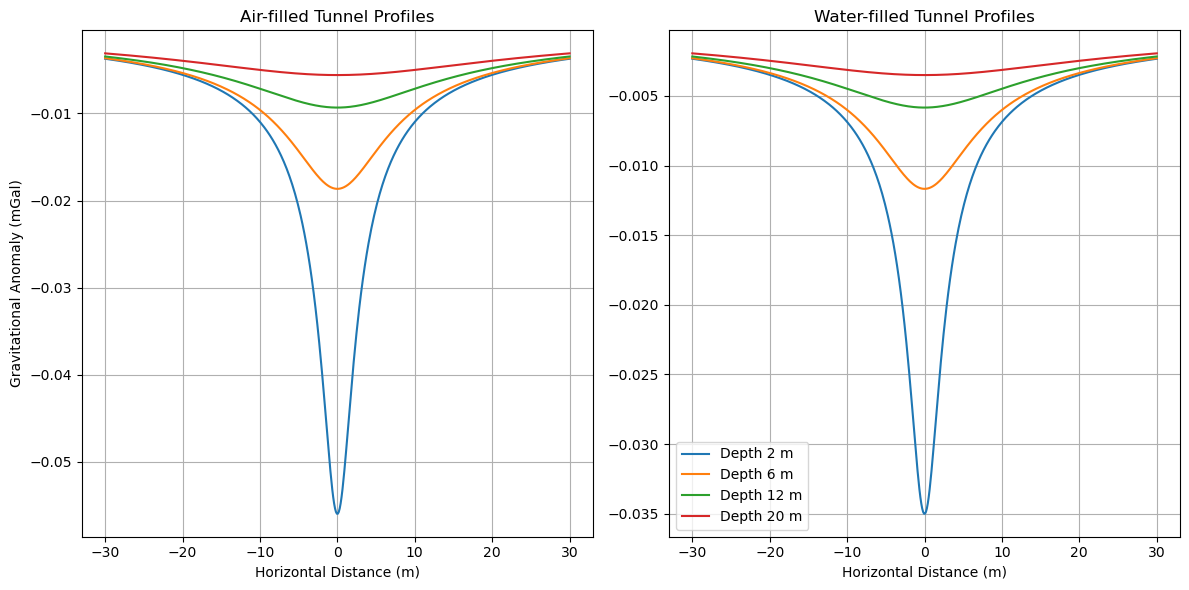

In [9]:
################################
####### Your work here #########
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot gravity profiles for air-filled tunnel
for depth in depths:
    gsubz_air = calculate_gsubz(rho_air, a, x, z, depth)  # Calculate gsubz for air-filled tunnel
    ax1.plot(x, gsubz_air, label=f'Depth {depth} m')  # Plot each profile with label

# Customize the air-filled subplot
ax1.set_title('Air-filled Tunnel Profiles')
ax1.set_xlabel('Horizontal Distance (m)')
ax1.set_ylabel('Gravitational Anomaly (mGal)')
ax1.grid(True)

# Plot gravity profiles for water-filled tunnel
for depth in depths:
    gsubz_water = calculate_gsubz(rho_water, a, x, z, depth)  # Calculate gsubz for water-filled tunnel
    ax2.plot(x, gsubz_water, label=f'Depth {depth} m')  # Plot each profile with label

# Customize the water-filled subplot
ax2.set_title('Water-filled Tunnel Profiles')
ax2.set_xlabel('Horizontal Distance (m)')
ax2.grid(True)

# Add legend to one of the subplots
ax2.legend()

# Display the plot
plt.tight_layout()
plt.show()


## Rectangular prisms in Harmonica

From here on out we will be doing our forward modeling using rectangular prisms and the Python package `harmonica`. Rectangular psisms are useful because we can use a bunch of them to approximate source distributions that we want to model, like the water beneath an ice shelf. Right rectangular prisms are defined by `[xmin, xmax, ymin, ymax, zmin, zmax]`. Here is an exmaple of calculating the vertical component of gravitational attraction due to two prisms, one with a positive density contrast and one with a negative density contrast.

In [10]:
# right rectangular prisms[xmin, xmax, ymin, ymax, zmin, zmax]

prisms = [
    [2e3, 4e3, 2e3, 8e3, -1e3, 0],
    [6e3, 8e3, 2e3, 8e3, -2e3, 0]
]

densities = [-1000, 1000]

# Define computation points on a grid at 1000m above the ground
coordinates = vd.grid_coordinates(
    region=[0, 10e3, 0, 10e3], shape=(100, 100), extra_coords=1000
)

gz = hm.prism_gravity(coordinates, prisms, densities, field="g_z")


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


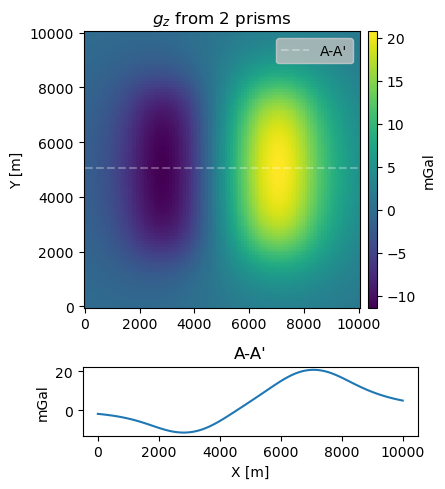

In [11]:
xx = coordinates[0]
yy = coordinates[1]

idx = 50
vmin = -0.65; vmax=0.65

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4.5,5), gridspec_kw={'height_ratios': [4, 1]})
pc = ax1.pcolormesh(xx, yy, gz)
ax1.hlines(yy[idx,0], xmin=np.min(xx), xmax=np.max(xx), colors='white', 
           linestyles='dashed', alpha=0.3, label="A-A'")
ax1.set_title(r'$g_z$ ' + f'from {len(prisms)} prisms')
ax1.set_ylabel('Y [m]')
plt.colorbar(pc, label='mGal', pad=0.02, aspect=30, ax=ax1)
ax1.axis('scaled')
ax1.legend(facecolor='silver')

ax2.plot(xx[idx,:], gz[idx,:])
ax2.set_title("A-A'")
ax2.set_xlabel('X [m]')
ax2.set_ylabel('mGal')

plt.tight_layout()
plt.show()

## Calculate the gravitational effect of Mount Shasta's topography - 2 pts

* Calculate the vertical component of gravitational attraction on a regular grid at **5000 m elevation**
* Make prisms from the `data` grid below, with prism bottoms at the minimum of the grid ("excess" topoography)
* Make the extent of your grid of observations large enough so that you can see where the **gravitational effect of Mount Shasta becomes becomes less than 1 mGal and estimate this distance**
* Use a density contrast of 2670 $kg/m^3$
* Use `harmonica.prism_gravity` as in the example above
* **Make a filled contour plot using `plt.contourf` and make an additional contour that shows the 1 mGal contour in a different color**

Hint: The x and y coordinates in the grid are registered to the center of the grid cells, i.e. there is an x and y for each data value. You will define the rectangular prisms based on the edges, so how can you find the coordinates of the edges? Note that the computational demand increases geometrically with the number of observation points so I recommend starting with a coarse observation spacing like 5 km

The two cells below load a SRTM DEM and convert the latitude/longitude to Mercator x/y and trim to an area around Shasta. The coordinates are centered to have Shasta around x=0, y=0.

In [12]:
import rioxarray
from pyproj import CRS, Transformer

data = rioxarray.open_rasterio(Path('/Users/holden/Desktop/Ice Shits/cryo_share copy/N41W123.hgt'), driver='SRTMHGT', engine='rasterio')
data = data.rename({'x': 'longitude','y': 'latitude'})
data = data.sel(longitude=slice(-122.3, -122.1), latitude=slice(41.49, 41.33), band=1)

transformer = Transformer.from_crs(4326, 3857)

lonlon, latlat = np.meshgrid(data.longitude.values, data.latitude.values)
xx, yy = transformer.transform(latlat, lonlon)
xx = xx-np.median(xx)
yy = yy-np.median(yy)

coordinates = vd.grid_coordinates(
    region=[np.min(xx), np.max(xx), np.min(yy), np.max(yy)], spacing=100, adjust='region', pixel_register=True
)

kn = vd.KNeighbors(10)
kn.fit((xx.flatten(), yy.flatten()), data.values.flatten())
preds = kn.predict((coordinates[0].flatten(), coordinates[1].flatten()))

x_uniq = np.unique(coordinates[0])
y_uniq = np.unique(coordinates[1])

data = xr.DataArray(
    data = preds.reshape(coordinates[0].shape),
    coords = dict(y=y_uniq, x=x_uniq),
    dims = ('y', 'x')
)
data

<xarray.DataArray (y: 237, x: 223)> Size: 423kB
array([[1193.6, 1193.1, 1195.4, ..., 1484.2, 1480.9, 1476.1],
       [1198.7, 1199.6, 1201.8, ..., 1487.1, 1485.7, 1483.5],
       [1203.3, 1203.9, 1207.4, ..., 1492.6, 1491.7, 1489.3],
       ...,
       [1321.9, 1329.4, 1336. , ..., 1894.5, 1892.2, 1891.5],
       [1320.2, 1325.4, 1330.6, ..., 1910.3, 1911.1, 1908.4],
       [1313.5, 1313.5, 1324.4, ..., 1931.9, 1927.9, 1920.4]])
Coordinates:
  * y        (y) float64 2kB -1.182e+04 -1.172e+04 ... 1.168e+04 1.178e+04
  * x        (x) float64 2kB -1.108e+04 -1.098e+04 ... 1.102e+04 1.112e+04

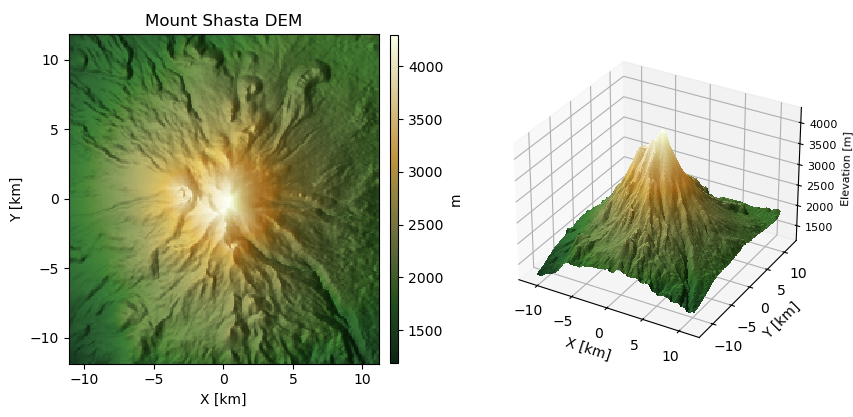

In [13]:
from matplotlib.gridspec import GridSpec
import cmocean
from matplotlib.colors import LightSource

topo_clip = cmocean.tools.crop(cmocean.cm.topo, 0, np.max(data), 0)

ls = LightSource(270, 45)
rgb = ls.shade(data.values, cmap=topo_clip, vert_exag=10, blend_mode='soft', dx=100, dy=100)

fig = plt.figure(figsize=(10,5))

gs = GridSpec(1, 2, wspace=0.05)
ax = fig.add_subplot(gs[0])
im = ax.pcolormesh(data.x/1000, data.y/1000, data, cmap=topo_clip)
ax.pcolormesh(data.x/1000, data.y/1000, rgb)
ax.axis('scaled')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_title('Mount Shasta DEM')
plt.colorbar(im, ax=ax, label='m', pad=0.03, aspect=40, shrink=0.85)

ax = fig.add_subplot(gs[1], projection='3d')
surf = ax.plot_surface(coordinates[0]/1000, coordinates[1]/1000, data.values, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Elevation [m]', fontsize=8)
ax.zaxis.set_tick_params(labelsize=8)

ax.set_box_aspect(aspect=None, zoom=0.85)

plt.show()

### 1. Make a Numpy array of prisms and array of densities

* Find the spacing of the `data` grid and calculate the half spacing (distance to the sides of the prisms)
* Make the full coordinates using `np.meshgrid`
* The bottom of all the prisms is the minimum topography
* The top of the prisms is the topography
* Calculate half of the grid spacing and use this to find the edges of the prisms
* The shape of the prisms should be (n_prims, 6)

In [14]:
import numpy as np
import xarray as xr

#Assuming 'data' is the original DataArray containing topography data of Mount Shasta

#Coarsens the data grid to reduce the number of prisms
#Chooses a coarsening factor (e.g., 2 for reducing data points by half in each dimension)
coarsening_factor = 4  # Adjust this factor based on desired coarseness

#Applies coarsening using mean reduction
data_coarse = data.coarsen(
    x=coarsening_factor,
    y=coarsening_factor,
    boundary='trim'
).mean()

#Recalculates the grid spacing and half spacing
x_coords = data_coarse.x.values
y_coords = data_coarse.y.values
dx = np.diff(x_coords)[0]  # New grid spacing in x-direction
dy = np.diff(y_coords)[0]  # New grid spacing in y-direction
half_dx = dx / 2           # Half spacing in x-direction
half_dy = dy / 2           # Half spacing in y-direction

#Creates full coordinates using np.meshgrid
X, Y = np.meshgrid(x_coords, y_coords)

#Defines the bottom and top of the prisms
z_bottom = np.min(data_coarse.values)  # Bottom of all prisms
z_top = data_coarse.values             # Top of prisms (coarsened topography)

#Calculates the edges of the prisms
x_min = X - half_dx
x_max = X + half_dx
y_min = Y - half_dy
y_max = Y + half_dy
z_min = np.full_like(z_top, z_bottom)
z_max = z_top

#Stacks the prism edges into an array of shape (n_prisms, 6)
prisms = np.column_stack((
    x_min.ravel(), x_max.ravel(),
    y_min.ravel(), y_max.ravel(),
    z_min.ravel(), z_max.ravel()
))

# Step 7: Create an array of densities
density_contrast = 2670  # Density contrast in kg/m^3
densities = np.full(prisms.shape[0], density_contrast)


### 2. Make a tuple of the observation coordinates and foward model $g_z$

* You can use `verde.grid_coordinates` to easily make a tuple of grid coordinates and use `extra_coords=5e3`
* Use `hm.prism_gravity` and set `field='g_z'`

In [15]:
#Ensurse data types are consistent
prisms = prisms.astype(np.float64)
densities = densities.astype(np.float64)

#Defines the expanded observation region
# Calculate the center coordinates from the coarsened data
x_center = x_coords.mean()
y_center = y_coords.mean()

#Defines the region from -50 km to +50 km around the center
region = (
    x_center - 50e3,  # x_min
    x_center + 50e3,  # x_max
    y_center - 50e3,  # y_max (note that y increases downward)
    y_center + 50e3   # y_min
)

#Uses the same grid spacing to avoid increasing computation time
observation_spacing = dx * 2  # Adjust as needed

#Creates observation coordinates using the expanded region
observation_coords = vd.grid_coordinates(
    region=region,
    spacing=observation_spacing,
    extra_coords=5000  # Observation height at 5 km
)

#Computes the gravitational acceleration g_z
easting = observation_coords[0].ravel().astype(np.float64)
northing = observation_coords[1].ravel().astype(np.float64)
upward = observation_coords[2].ravel().astype(np.float64)

#Computes the gravity field with parallel processing
gravity_field = hm.prism_gravity(
    coordinates=(easting, northing, upward),
    prisms=prisms,
    density=densities,
    field='g_z',
    parallel=True,       # Enable parallel computation
    progressbar=False    # Disable progress bar
)

### 3. Make the figure

* use `plt.contourf`
* use an additional `plt.contour` with `levels=[1]` to place a contour at 1 mGal
* Estimate the distance to the 1 mGal contour and write this below the figure

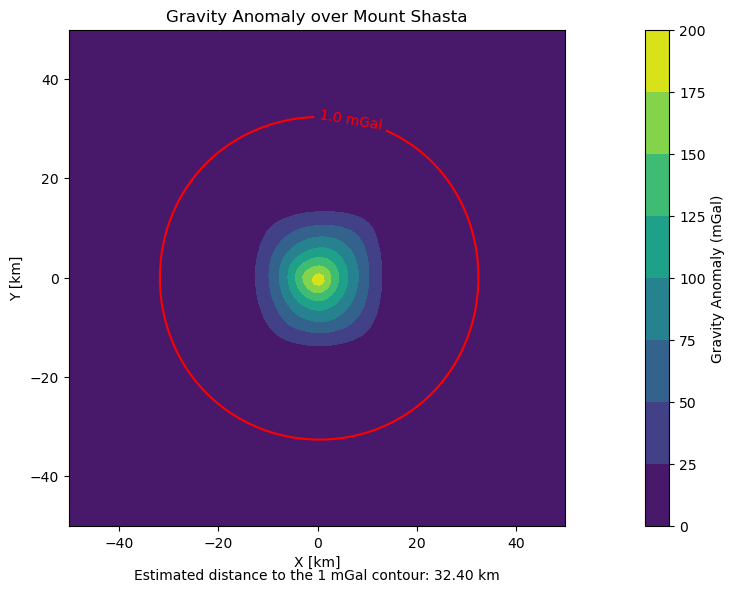

In [16]:
#Reshapes gravity_field to match the observation grid shape
grid_shape = observation_coords[0].shape
gz = gravity_field.reshape(grid_shape)

#Plots the gravity anomaly using plt.contourf
plt.figure(figsize=(8, 6))
x_plot = observation_coords[0] / 1000  # Convert to kilometers
y_plot = observation_coords[1] / 1000  # Convert to kilometers

contourf = plt.contourf(x_plot, y_plot, gz, cmap='viridis')
plt.colorbar(contourf, label='Gravity Anomaly (mGal)')

#Adds a contour at 1 mGal
contour = plt.contour(x_plot, y_plot, gz, levels=[1], colors='red')
plt.clabel(contour, fmt='%1.1f mGal', colors='red')

#Estimates the distance to the 1 mGal contour
indices = np.where(np.isclose(gz, 1, atol=0.05))
x_1mGal = x_plot[indices]
y_1mGal = y_plot[indices]

x_center_km = x_center / 1000  # Convert center coordinates to kilometers
y_center_km = y_center / 1000

distances = np.sqrt((x_1mGal - x_center_km)**2 + (y_1mGal - y_center_km)**2)

if distances.size > 0:
    distance_to_1mGal = distances.mean()
else:
    distance_to_1mGal = np.nan

#Annotates the figure
plt.text(0.5, -0.1,
         f'Estimated distance to the 1 mGal contour: {distance_to_1mGal:.2f} km',
         ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.title('Gravity Anomaly over Mount Shasta')

#Sets the plot limits to -50 km to +50 km around the center
plt.xlim(x_center_km - 50, x_center_km + 50)
plt.ylim(y_center_km - 50, y_center_km + 50)
plt.axis('scaled')  # Ensure equal scaling on both axes
plt.tight_layout()
plt.show()

### 4. Approximately how far away from Mount Shasta do you have to be to for the gravity anomaly to be 1 mGal

## 32.40 km

## Forward calculate the gravity due to ice, water, and rock in your ice shelf domain - 4 pts

* Make a figure with 5 subplots: the gravity due to ice, water, rock, negative rock ,all of them added together, and the free air anomaly
* Calculate the vertical component of gravitational attraction at your gravity observation locations
* **You can downsample your gravity data.** You probably want less than 100,000 observation locations

### This problem is broken down into the numbered steps below:

### 1. load your BedMachine and gravity processed datasets

In [17]:
bedmachine = xr.open_dataset('/Users/holden/Desktop/Ice Shits/cryo_share copy/processed_data/final_bedmachine_dataset_polar_stereo.nc')
gravity_data_path = pd.read_csv('/Users/holden/Desktop/Ice Shits/cryo_share copy/processed_data/final_gravity_dataset.csv')

### 2. Add bed and surface data variables referenced to the ellipsoid to your BedMachine xarray 

Gives the bed and surface new names in your xarray dataset, e.g., *bed_ell*. The bed and surface are currently referenced to sea level. This means add the **geoid** to the bed and surface to reference them to the ellipsoid.

In [18]:
if 'geoid' in bedmachine.variables:
    # Add the geoid to the bed and surface to reference them to the ellipsoid
    bedmachine['bed_ell'] = bedmachine['bed'] + bedmachine['geoid']
    bedmachine['surface_ell'] = bedmachine['surface'] + bedmachine['geoid']
else:
    raise KeyError("Error: 'geoid' variable not found in the BedMachine dataset.")

### 3. Make masks for water, ice, rock, and negative rock (negative geoid anomaly over water) and plot them as 4 subplots

* The water mask will include open water (0 in mask) and ice shelves (3 in mask)
* The ice mask will include ice shelves (3 in mask) and grounded ice (2 in mask)
* The rock mask is where there bed above the ellipsoid (be sure you use the bed referenced to the ellipsoid)
* The negative rock mask is the surface referenced to the ellipsoid is below zero (negative geoid anomaly over water)
* Note the bitwise-or symbol is ^ if you are thinking like mask1 OR mask2

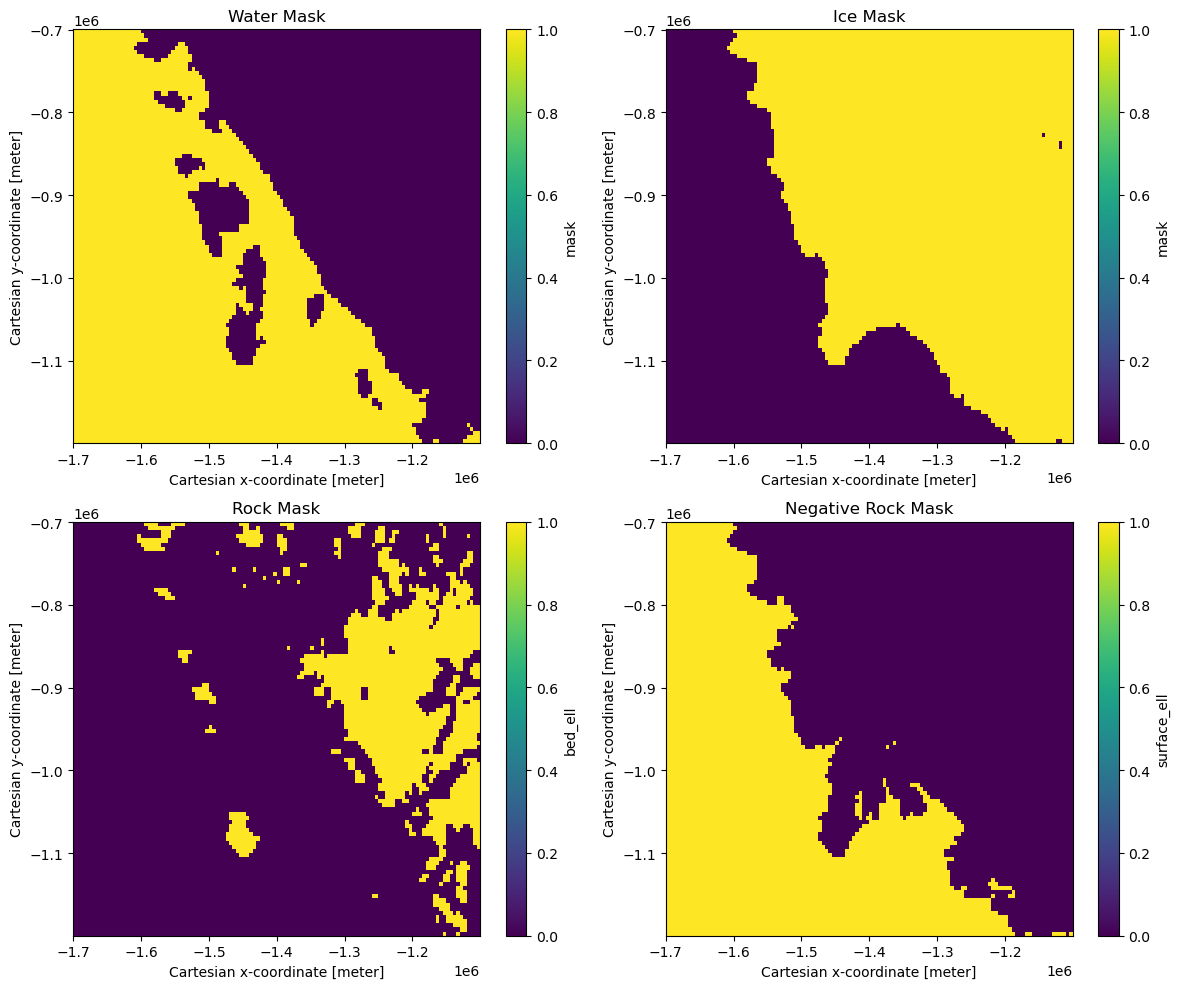

In [19]:
#water mask: includes open water (mask == 0) and ice shelves (mask == 3)
water_mask = (bedmachine['mask'] == 0) | (bedmachine['mask'] == 3)

#ice mask: includes ice shelves (mask == 3) and grounded ice (mask == 2)
ice_mask = (bedmachine['mask'] == 3) | (bedmachine['mask'] == 2)

#Rock mask: where bed is above the ellipsoid
rock_mask = bedmachine['bed_ell'] > 0

#Negative rock mask: where surface referenced to the ellipsoid is below zero
negative_rock_mask = bedmachine['surface_ell'] < 0

#Plots the masks as 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#Plots water mask
water_mask.plot(ax=axs[0, 0])
axs[0, 0].set_title('Water Mask')

#Plots ice mask
ice_mask.plot(ax=axs[0, 1])
axs[0, 1].set_title('Ice Mask')

#Plots rock mask
rock_mask.plot(ax=axs[1, 0])
axs[1, 0].set_title('Rock Mask')

#Plots negative rock mask
negative_rock_mask.plot(ax=axs[1, 1])
axs[1, 1].set_title('Negative Rock Mask')

plt.tight_layout()
plt.show()

### 4. Make prisms for water, ice, rock, and negative rock

* make 2D coordinates of your BedMachine data using `np.meshgrid`
* index these coordinates with your mask
* Note that our coordinates reference the center of our grid cells. The sides of our prisms will therefor extend from the coordinates by half of our grid spacing
* Think about water column thickness from the previous lab for the water prisms
* The form of the prisms array will be similar to the shasta problem, although you can remove the flattening and add the mask, since the masked array will be flattened
* Since water and ice prisms can extend above and below the ellipsoid we will have to split them up and assign the density contrasts correctly. I've proved a `split_prisms` which will split the array of prisms properly and then recombine them and return the new array and the indices of the prisms above the ellipsoid. The indicies are important so that when you are making the density array you can use `np.where` or a Boolean operator to assign the right density

In [20]:
if 'thickness' not in bedmachine.variables:
    raise KeyError("Error: 'thickness' variable not found in the BedMachine dataset.")

#Flattens 'thickness' for processing
thickness_flat = bedmachine['thickness'].values.flatten()

#Extracts x and y coordinates
x = bedmachine['x'].values
y = bedmachine['y'].values

#Creates 2D cord grid
X, Y = np.meshgrid(x, y)

#Flattens arrays
X_flat = X.flatten()
Y_flat = Y.flatten()
bed_ell_flat = bedmachine['bed_ell'].values.flatten()
surface_ell_flat = bedmachine['surface_ell'].values.flatten()

#Flattens masks
water_mask_flat = water_mask.values.flatten()
ice_mask_flat = ice_mask.values.flatten()
rock_mask_flat = rock_mask.values.flatten()
negative_rock_mask_flat = negative_rock_mask.values.flatten()

#Calculates grid spacing (assuming uniform spacing)
dx = np.abs(x[1] - x[0])
dy = np.abs(y[1] - y[0])

#Helper function to create prisms
def create_prisms(X_masked, Y_masked, top_masked, bottom_masked):
    prisms = np.vstack([
        X_masked - dx/2,  # west
        X_masked + dx/2,  # east
        Y_masked - dy/2,  # south
        Y_masked + dy/2,  # north
        bottom_masked,    # bottom
        top_masked        # top
    ]).T
    return prisms

#Flattens 'thickness' array
thickness_flat = bedmachine['thickness'].values.flatten()

#Creates prisms for water
water_X = X_flat[water_mask_flat]
water_Y = Y_flat[water_mask_flat]
water_bottom = bed_ell_flat[water_mask_flat]
water_top = surface_ell_flat[water_mask_flat] - thickness_flat[water_mask_flat]

water_prisms = create_prisms(water_X, water_Y, water_top, water_bottom)

#Creates prisms for ice
ice_X = X_flat[ice_mask_flat]
ice_Y = Y_flat[ice_mask_flat]
ice_top = surface_ell_flat[ice_mask_flat]
ice_bottom = surface_ell_flat[ice_mask_flat] - thickness_flat[ice_mask_flat]

ice_prisms = create_prisms(ice_X, ice_Y, ice_top, ice_bottom)

#Creates prisms for rock
rock_X = X_flat[rock_mask_flat]
rock_Y = Y_flat[rock_mask_flat]
rock_top = bed_ell_flat[rock_mask_flat]
rock_bottom = np.full_like(rock_top, 0)  # Bottom at ellipsoid

rock_prisms = create_prisms(rock_X, rock_Y, rock_top, rock_bottom)

#Negative rock prisms
neg_rock_X = X_flat[negative_rock_mask_flat]
neg_rock_Y = Y_flat[negative_rock_mask_flat]
neg_rock_top = np.zeros_like(neg_rock_X)  # Ellipsoid at zero
neg_rock_bottom = surface_ell_flat[negative_rock_mask_flat]

negative_rock_prisms = create_prisms(neg_rock_X, neg_rock_Y, neg_rock_top, neg_rock_bottom)

#Split_prisms function
def split_prisms(prisms):
    '''
    Function to split prisms above and below the ellipsoid.
    Returns combined prisms and an index of which ones are above the ellipsoid.
    '''
    prisms_pos = prisms[prisms[:,5] >= 0, :]
    prisms_neg = prisms[prisms[:,4] < 0, :]
    prisms_pos[prisms_pos[:,4] < 0, 4] = 0.0
    prisms_neg[prisms_neg[:,5] > 0, 5] = 0.0
    prisms = np.vstack([prisms_pos, prisms_neg])
    idx_pos = np.full(prisms.shape[0], False)
    idx_pos[:prisms_pos.shape[0]] = True
    return prisms, idx_pos

#Splits water and ice prisms 
water_prisms_split, water_idx_above = split_prisms(water_prisms)
ice_prisms_split, ice_idx_above = split_prisms(ice_prisms)

### 5. Make density arrays corresponding with prisms

Use a rock density of 2670, ice density of 917, and water density of 1025 $kg/m^3$. Note that ice and water prisms extending across the ellipsoid need to be split so that the correct densities can be assigned. The `split_prisms` will return the new prisms and indices of which prisms are above the ellipsoid.

In [21]:
#Densities in kg/m^3
rho_rock = 2670
rho_ice = 917
rho_water = 1025

#Assigns densities to water prisms
# For prisms above the ellipsoid (z > 0), density contrast is between water and air (negligible), so we use rho_water
# For prisms below the ellipsoid (z < 0), density contrast = rho_water - rho_rock
water_densities = np.where(water_idx_above, rho_water, rho_water - rho_rock)

#Assigns densities to ice prisms
# For prisms above the ellipsoid (z > 0), the density contrast is between ice and air, so we use rho_ice
# For prisms below the ellipsoid (z < 0), the density contrast = rho_ice - rho_rock
ice_densities = np.where(ice_idx_above, rho_ice, rho_ice - rho_rock)

#Assigns densities to rock prisms
# Rock prisms have a density contrast of rho_rock relative to zero
rock_densities = np.full(rock_prisms.shape[0], rho_rock)

#Assigns densities to negative rock prisms
# Negative rock prisms represent areas where the surface is below the ellipsoid
# They have a density contrast of -rho_rock
negative_rock_densities = np.full(negative_rock_prisms.shape[0], -rho_rock)

### 6. Remove any spurious prisms

Check for any prisms with their bottom over their top and remove them. This can happen due to coarsening. Commented is an example. Do this for the water, ice, rock, and negative rock prisms.

In [22]:
def remove_spurious_prisms(prisms, densities):
    valid = prisms[:, 4] < prisms[:, 5]
    return prisms[valid], densities[valid]

#Removes spurious prisms from water
water_prisms_valid, water_densities_valid = remove_spurious_prisms(water_prisms_split, water_densities)

#Removes spurious prisms from ice
ice_prisms_valid, ice_densities_valid = remove_spurious_prisms(ice_prisms_split, ice_densities)

#Removes spurious prisms from rock
rock_prisms_valid, rock_densities_valid = remove_spurious_prisms(rock_prisms, rock_densities)

#Removes spurious prisms from negative rock
negative_rock_prisms_valid, negative_rock_densities_valid = remove_spurious_prisms(negative_rock_prisms, negative_rock_densities)


### 7. Make tuple of gravity observation points and print the number of observation points

These are the x, y, and height values of your gravity data. You probably don't want more than 100,000 points so feel free to downsample to a reasonable amount.

In [23]:
#Extracts observation points from 'gravity_data_path' using the correct column names
x_obs = gravity_data_path['polar_stereo_x'].values
y_obs = gravity_data_path['polar_stereo_y'].values
height_obs = gravity_data_path['measurement_height'].values

#Downsamples if necessary
max_points = 100000
if len(x_obs) > max_points:
    indices = np.random.choice(len(x_obs), size=max_points, replace=False)
    x_obs = x_obs[indices]
    y_obs = y_obs[indices]
    height_obs = height_obs[indices]

#Creates tuple of observation points
coordinates = (x_obs, y_obs, height_obs)

#Prints the number of observation points
print(f"Number of observation points: {len(x_obs)}")

Number of observation points: 100000


### 8. Forward model the vertical component of the gravitational acceleration due to the prisms

Separately compute the gravity due to the water, ice, rock, and negative rock using `hm.prism_gravity`. We are computing the 'g_z' field. If you're interested in how long this cell takes to compute you can put %%time as the first thing in the cell, however I recommend doing this only after you know the code works as the timing of the cell can make it harder to interpret error messages.

In [24]:
#Computes gravity effect due to water prisms
g_water = hm.prism_gravity(
    coordinates, water_prisms_valid, water_densities_valid, field='g_z'
)

#Computes gravity effect due to ice prisms
g_ice = hm.prism_gravity(
    coordinates, ice_prisms_valid, ice_densities_valid, field='g_z'
)

#Computes gravity effect due to rock prisms
g_rock = hm.prism_gravity(
    coordinates, rock_prisms_valid, rock_densities_valid, field='g_z'
)

#Computes gravity effect due to negative rock prisms
g_negative_rock = hm.prism_gravity(
    coordinates, negative_rock_prisms_valid, negative_rock_densities_valid, field='g_z'
)

#Sum of all components
g_total = g_water + g_ice + g_rock + g_negative_rock

#Free-air anomaly from gravity data
if 'faa140' in gravity_data_path.columns:
    free_air_anomaly = gravity_data_path['faa140'].values
    if len(free_air_anomaly) > max_points:
        free_air_anomaly = free_air_anomaly[indices]
else:
    raise KeyError("Error: 'faa140' column not found in gravity data.")


### 9. Make a plot of the 4 different components, the sum of the components, and the free air anomaly

You should be able to see that the different gravity components line up with what you know about the ice thickness and bathymetry near your ice shelf. If it doesn't match up with your expectations then discuss it with Mickey or I :). In my region near Thwaites, the ice is grounded well below the ellipsoid so most of my ice produces a negative gravity disturbance. If you have a lot of ice in your domain that is grounded above sea level you will see a positive disturbance. Your water should produce a negative disturbance. However, if you have a positive geoid anomaly, some of the water might be contributing a positive disturbance and your negative rock disturbance will be zero. If you have a negative geoid anomaly, i.e., average sea level lies below the ellipsoid, then you should have a negative disturbance from the negative rock. If you do have a negative rock disturbance it should be very small. Feel free to make additional plots to highlight certain components of the gravity disturbance.

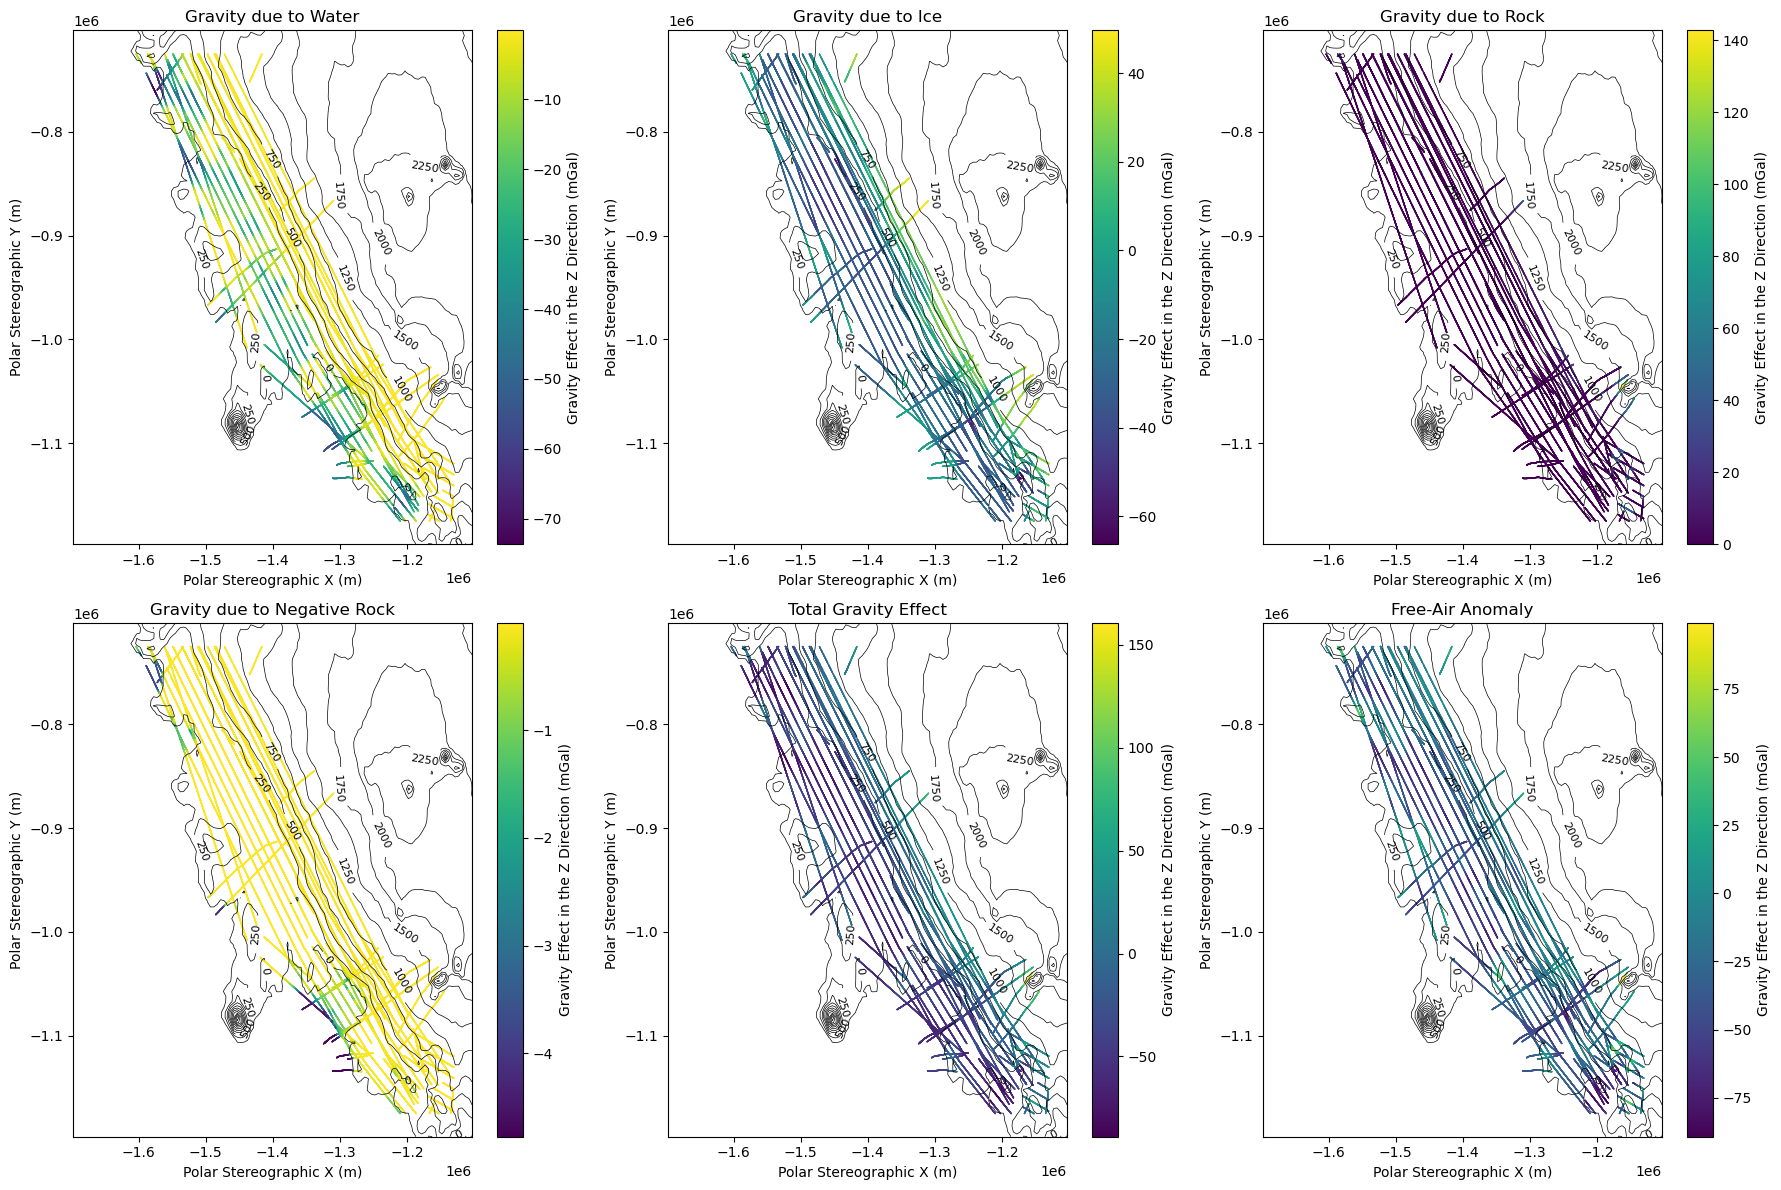

In [25]:
surface_elevation = bedmachine['surface_ell'].values
x_bedmachine = bedmachine['x'].values
y_bedmachine = bedmachine['y'].values

#Creates meshgrid for BedMachine data
X_bedmachine, Y_bedmachine = np.meshgrid(x_bedmachine, y_bedmachine)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

def plot_gravity_with_contours(ax, x_obs, y_obs, gravity_data, title):
    # Plot the BedMachine surface elevation as black and white contours
    contours = ax.contour(
        X_bedmachine, Y_bedmachine, surface_elevation,
        levels=15, colors='black', linewidths=0.5
    )
    ax.clabel(contours, inline=True, fontsize=8, fmt='%1.0f')
    
    # Overlay the gravity data
    sc = ax.scatter(
        x_obs, y_obs, c=gravity_data, s=1, cmap='viridis', edgecolor='none'
    )
    ax.set_title(title)
    ax.set_xlabel('Polar Stereographic X (m)')
    ax.set_ylabel('Polar Stereographic Y (m)')
    # Add colorbar for gravity data only
    plt.colorbar(sc, ax=ax, orientation='vertical', label='Gravity Effect in the Z Direction (mGal)')

#Plots gravity due to water
plot_gravity_with_contours(axs[0, 0], x_obs, y_obs, g_water, 'Gravity due to Water')

#Plots gravity due to ice
plot_gravity_with_contours(axs[0, 1], x_obs, y_obs, g_ice, 'Gravity due to Ice')

#Plots gravity due to rock
plot_gravity_with_contours(axs[0, 2], x_obs, y_obs, g_rock, 'Gravity due to Rock')

#Plots gravity due to negative rock
plot_gravity_with_contours(axs[1, 0], x_obs, y_obs, g_negative_rock, 'Gravity due to Negative Rock')

#Plots total gravity effect
plot_gravity_with_contours(axs[1, 1], x_obs, y_obs, g_total, 'Total Gravity Effect')

#Plots free-air anomaly
plot_gravity_with_contours(axs[1, 2], x_obs, y_obs, free_air_anomaly, 'Free-Air Anomaly')

plt.tight_layout()
plt.show()

In [30]:
# Step 2: Forward Model the Terrain Effect and Export It for Lab 3

import pandas as pd
import os

# -------------------------------
# Ensure that 'g_total' has been computed in Part 8
# -------------------------------
# Verify that 'g_total' exists
if 'g_total' not in locals():
    raise NameError("Error: 'g_total' has not been computed. Please ensure Part 8 of Lab 2 has been executed.")

# -------------------------------
# Export 'g_total' along with observation coordinates to CSV
# -------------------------------

# Define the export path
export_dir = '/Users/holden/Desktop/Ice Shits/cryo_share copy/processed_data/'
export_filename = 'terrain_effect.csv'
terrain_effect_path = os.path.join(export_dir, export_filename)

# Create a DataFrame with observation coordinates and 'g_total'
terrain_effect_df = pd.DataFrame({
    'polar_stereo_x': x_obs,
    'polar_stereo_y': y_obs,
    'g_total': g_total
})

# Export the DataFrame to CSV
try:
    terrain_effect_df.to_csv(terrain_effect_path, index=False)
    print(f"Terrain effect (g_total) successfully exported to {terrain_effect_path}")
except Exception as e:
    raise IOError(f"Failed to export terrain effect to CSV: {e}")

# -------------------------------
# Optional: Save additional components if needed
# -------------------------------
# For example, saving individual gravity components
# Uncomment the following lines if you wish to export them

individual_gravities_df = pd.DataFrame({
     'polar_stereo_x': x_obs,#     'polar_stereo_y': y_obs,
     'g_water': g_water,
     'g_ice': g_ice,
     'g_rock': g_rock,
     'g_negative_rock': g_negative_rock
})
individual_gravities_path = os.path.join(export_dir, 'individual_gravities.csv')
individual_gravities_df.to_csv(individual_gravities_path, index=False)
print(f"Individual gravity components exported to {individual_gravities_path}")


Terrain effect (g_total) successfully exported to /Users/holden/Desktop/Ice Shits/cryo_share copy/processed_data/terrain_effect.csv
Individual gravity components exported to /Users/holden/Desktop/Ice Shits/cryo_share copy/processed_data/individual_gravities.csv
